In [87]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [126]:
def lorentzian(x, x_0, y_0, A, gamma):
    y = y_0 + 0.5*A*gamma/((x-x_0)**2 + (0.5*gamma)**2)
    return y
def line(x, m, b):
    y = m*x + b
    return y
def sine(x, t, A, offset, phase):
    y = offset + A*np.sin(2*np.pi/t * x + phase)
    return y
    

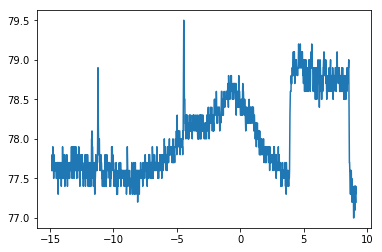

In [334]:
temp_data = np.loadtxt('/home/qsimexpcontrol/plots/cavity_drift/2018-7-14-temp.dat', delimiter= ',')
temps = []
times = []

for item in temp_data:
    temps.append(item[1])
    times.append(item[-1])
plt.plot((times - times[0])/3600 - 14.86, temps)


3.76852926039
25.682427093


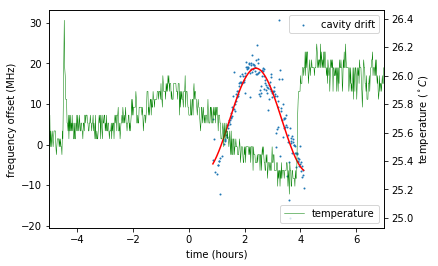

In [378]:
datasets = range(6076, 6260)# +  range(7073, 7211)
centers = []
times= []

temp_data = np.loadtxt('/home/qsimexpcontrol/plots/cavity_drift/2018-7-14-temp.dat', delimiter= ',')
temps = []
temp_times = []

for item in temp_data:
    temps.append((item[1] - 32)*5/9)
    temp_times.append(item[-1])


for dataset in datasets:
    data = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/InterleavedLinescan.dir/0' + str(dataset) + ' - InterleavedLinescan.csv', delimiter=',')
    f = open('/home/qsimexpcontrol/LabRAD/data/InterleavedLinescan.dir/0' + str(dataset) + ' - InterleavedLinescan.ini')
    f.readline()
    f.readline()
    timestamp = f.readline()[18:-1]
    day = timestamp[0:2]
    hour = timestamp[4:6]
    minute = timestamp[7:9]
    time = (float(day) - 14)*24 + float(hour) - 14 + float(minute)/60.
    x = data[:,0]
    y = data[:,1]
    fit, pcov1 = curve_fit(lorentzian, x,y, p0=[0.0, 0.0, 17200, 50.])
    perr = np.sqrt(np.diag(pcov1))
    times.append(time)
    centers.append(fit[0])
    
fig, ax1 = plt.subplots()
fit, pcov1 = curve_fit(sine, times, centers, p0=[6, 20, -6, -0.86])
ax1.scatter(times, centers, s=1, label = 'cavity drift')
x = np.linspace(times[0], times[-1], 200)
ax1.plot(x, sine(x, fit[0], fit[1], fit[2], fit[3]), color='red')
ax2 = ax1.twinx()
ax2.plot((temp_times - temp_times[0])/3600 - 14.86, temps, color='g', linewidth=0.5, label = 'temperature')
ax1.set_xlim([-5,7])
ax1.set_xlabel('time (hours)')
ax1.set_ylabel('frequency offset (MHz)')
ax2.set_ylabel(r'temperature ($^\circ C$)')
ax1.legend(loc=1)
ax2.legend(loc=4)
plt.savefig('/home/qsimexpcontrol/plots/cavity_drift/14JUL2018_cavity_drift.pdf')
print fit[0]
print 2*fit[1]

18.7882165794
75.3287393095
-50.657677412


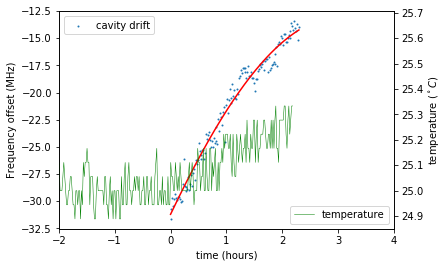

In [381]:
datasets = range(7073, 7211)
centers = []

temp_data = np.loadtxt('/home/qsimexpcontrol/plots/cavity_drift/2018-7-15-temp.dat', delimiter= ',')
temps = []
temp_times = []

for item in temp_data:
    temps.append((item[1] - 32)*5/9)
    temp_times.append(item[-1])

for dataset in datasets:
    data = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/InterleavedLinescan.dir/0' + str(dataset) + ' - InterleavedLinescan.csv', delimiter=',')
    x = data[:,0]
    y = data[:,1]
    fit, pcov1 = curve_fit(lorentzian, x,y, p0=[0.0, 0.0, 17200, 50.])
    centers.append(fit[0])

fig, ax1 = plt.subplots()
x = np.linspace(0, len(datasets), len(datasets))
fit, pcov1 = curve_fit(sine, x, centers, p0=[200, 20, -24, -0.86])
ax1.scatter(x/60, centers, s = 1, label='cavity drift')
ax1.plot(x/60, sine(x, fit[0], fit[1], fit[2], fit[3]), color='red')
ax2 = ax1.twinx()
ax2.plot((temp_times - temp_times[0])/3600 -7.88, temps, color='g', linewidth=0.5, label = 'temperature')
ax1.set_xlim([-2,4])
ax1.set_xlabel('time (hours)')
ax1.set_ylabel('Frequency offset (MHz)')
ax2.set_ylabel(r'temperature ($^\circ C$)')
ax1.legend(loc=2)
ax2.legend(loc=4)
plt.savefig('/home/qsimexpcontrol/plots/cavity_drift/15JUL2018_cavity_drift.pdf')
print fit[0]/60.
print fit[1]*2
print fit[2]